<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/BianHillU8proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Consumption in the US: Are we all going to explode from gas inhalation?



For this project, I'm looking at different energy sources and seeing which ones contribute the most to total energy usage. Not my first choice; I wanted to do something about cheese. Unfortunely, people apparently don't care about cheese as much as I do because there's literally no data sets on anything to do with cheese. Very sad 😞. I know the basic functioning human context of energy sources but nothing more than that. This dataset specifically is energy consumption in the US in residential sectors.

In [1]:
!pip install preliz

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import preliz as pz

In [3]:
!pip install pymc-bart
import pymc_bart as pmb

In [4]:
url="https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/Energy_Consumption3.csv"
elec = pd.read_csv(url)
elec.dropna()

Coal Consumed by the Residential Sector  \
192                                    3.141   
193                                    3.442   
194                                    2.542   
195                                    2.536   
196                                    1.667   
..                                       ...   
415                                    0.549   
416                                    0.494   
417                                    0.671   
418                                    0.799   
419                                    0.865   

     Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels)  \
192                                            770.700                                       
193                                            762.768                                       
194                                            662.882                                       
195                                            425.431                                       
196                                            263.055                                       
..                                                 ...                                       
415                                            114.680                                       
416                                            119.134                                       
417                                            178.341                                       
418                                            414.967                                       
419                                            734.806                                       

     Petroleum Consumed by the Residential Sector  \
192                                       193.835   
193                                       171.003   
194                                       169.116   
195                                       121.988   
196                                       104.001   
..                                            ...   
415                                        62.402   
416                                        66.646   
417                                        84.760   
418                                       128.411   
419                                       188.091   

     Total Fossil Fuels Consumed by the Residential Sector  \
192                                            967.676       
193                                            937.213       
194                                            834.540       
195                                            549.956       
196                                            368.723       
..                                                 ...       
415                                            177.632       
416                                            186.274       
417                                            263.772       
418                                            544.176       
419                                            923.762       

     Geothermal Energy Consumed by the Residential Sector  \
192                                              0.425      
193                                              0.384      
194                                              0.425      
195                                              0.411      
196                                              0.425      
..                                                 ...      
415                                              1.868      
416                                              1.808      
417                                              1.868      
418                                              1.808      
419                                              1.868      

     Solar Energy Consumed by the Residential Sector  \
192                                            2.794   
193                                            3.012   
194             

I renamed all of the columns since they had really long names and I didn't want to type all of that everytime I wanted to use that column.

In [5]:
elec.rename(columns={'Coal Consumed by the Residential Sector':'Coal','Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels)':'Natural_Gas','Petroleum Consumed by the Residential Sector':'Petroleum','Total Fossil Fuels Consumed by the Residential Sector':'Fossil_Fuels','Geothermal Energy Consumed by the Residential Sector':'Geothermal','Solar Energy Consumed by the Residential Sector':'Solar','Biomass Energy Consumed by the Residential Sector':'Biomass','Total Renewable Energy Consumed by the Residential Sector':'Renewable','Total Primary Energy Consumed by the Residential Sector':'Primary','Electricity Sales to Ultimate Customers in the Residential Sector':'Electricity_Sales','End-Use Energy Consumed by the Residential Sector':'End_Use','Electricity System Energy Losses Proportioned to the Residential Sector':'Electricity_System_Losses','Total Energy Consumed by the Residential Sector':'Total_Energy'}, inplace=True)

In [6]:
elec.dropna()

Coal  Natural_Gas  Petroleum  Fossil_Fuels  Geothermal  Solar  Biomass  \
192  3.141      770.700    193.835       967.676       0.425  2.794   78.137   
193  3.442      762.768    171.003       937.213       0.384  3.012   70.575   
194  2.542      662.882    169.116       834.540       0.425  4.150   78.137   
195  2.536      425.431    121.988       549.956       0.411  4.574   75.616   
196  1.667      263.055    104.001       368.723       0.425  5.050   78.137   
..     ...          ...        ...           ...         ...    ...      ...   
415  0.549      114.680     62.402       177.632       1.868  5.483   35.671   
416  0.494      119.134     66.646       186.274       1.808  5.001   34.521   
417  0.671      178.341     84.760       263.772       1.868  4.558   35.671   
418  0.799      414.967    128.411       544.176       1.808  3.739   34.521   
419  0.865      734.806    188.091       923.762       1.868  3.549   35.671   

     Renewable   Primary  Electricity_Sales   End_Use  \
192     81.356  1049.032            290.773  1339.806   
193     73.971  1011.184            267.131  1278.316   
194     82.712   917.252            263.909  1181.161   
195     80.602   630.557            221.127   851.684   
196     83.611   452.335            208.856   661.191   
..         ...       ...                ...       ...   
415     43.023   220.655            512.146   732.801   
416     41.330   227.603            441.895   669.499   
417     42.098   305.870            354.008   659.878   
418     40.068   584.243            327.227   911.471   
419     41.089   964.850            400.596  1365.446   

     Electricity_System_Losses  Total_Energy  
192                    586.876      1926.681  
193                    536.042      1814.358  
194                    536.501      1717.662  
195                    431.130      1282.814  
196                    444.058      1105.249  
..                         ...           ...  
415                   1067.734      1800.535  
416                    828.900      1498.398  
417                    687.303      1347.181  
418                    651.691      1563.161  
419                    837.821      2203.267  

[228 rows x 13 columns]

Pair plots help to visualize whether or not there's trends between variables. Blobs of dots probably means your data is no good and you won't be able to model anything from it. Fortunetly, I see many trends despite still having blocks of dots from variables that don't make any trends together. Yay!

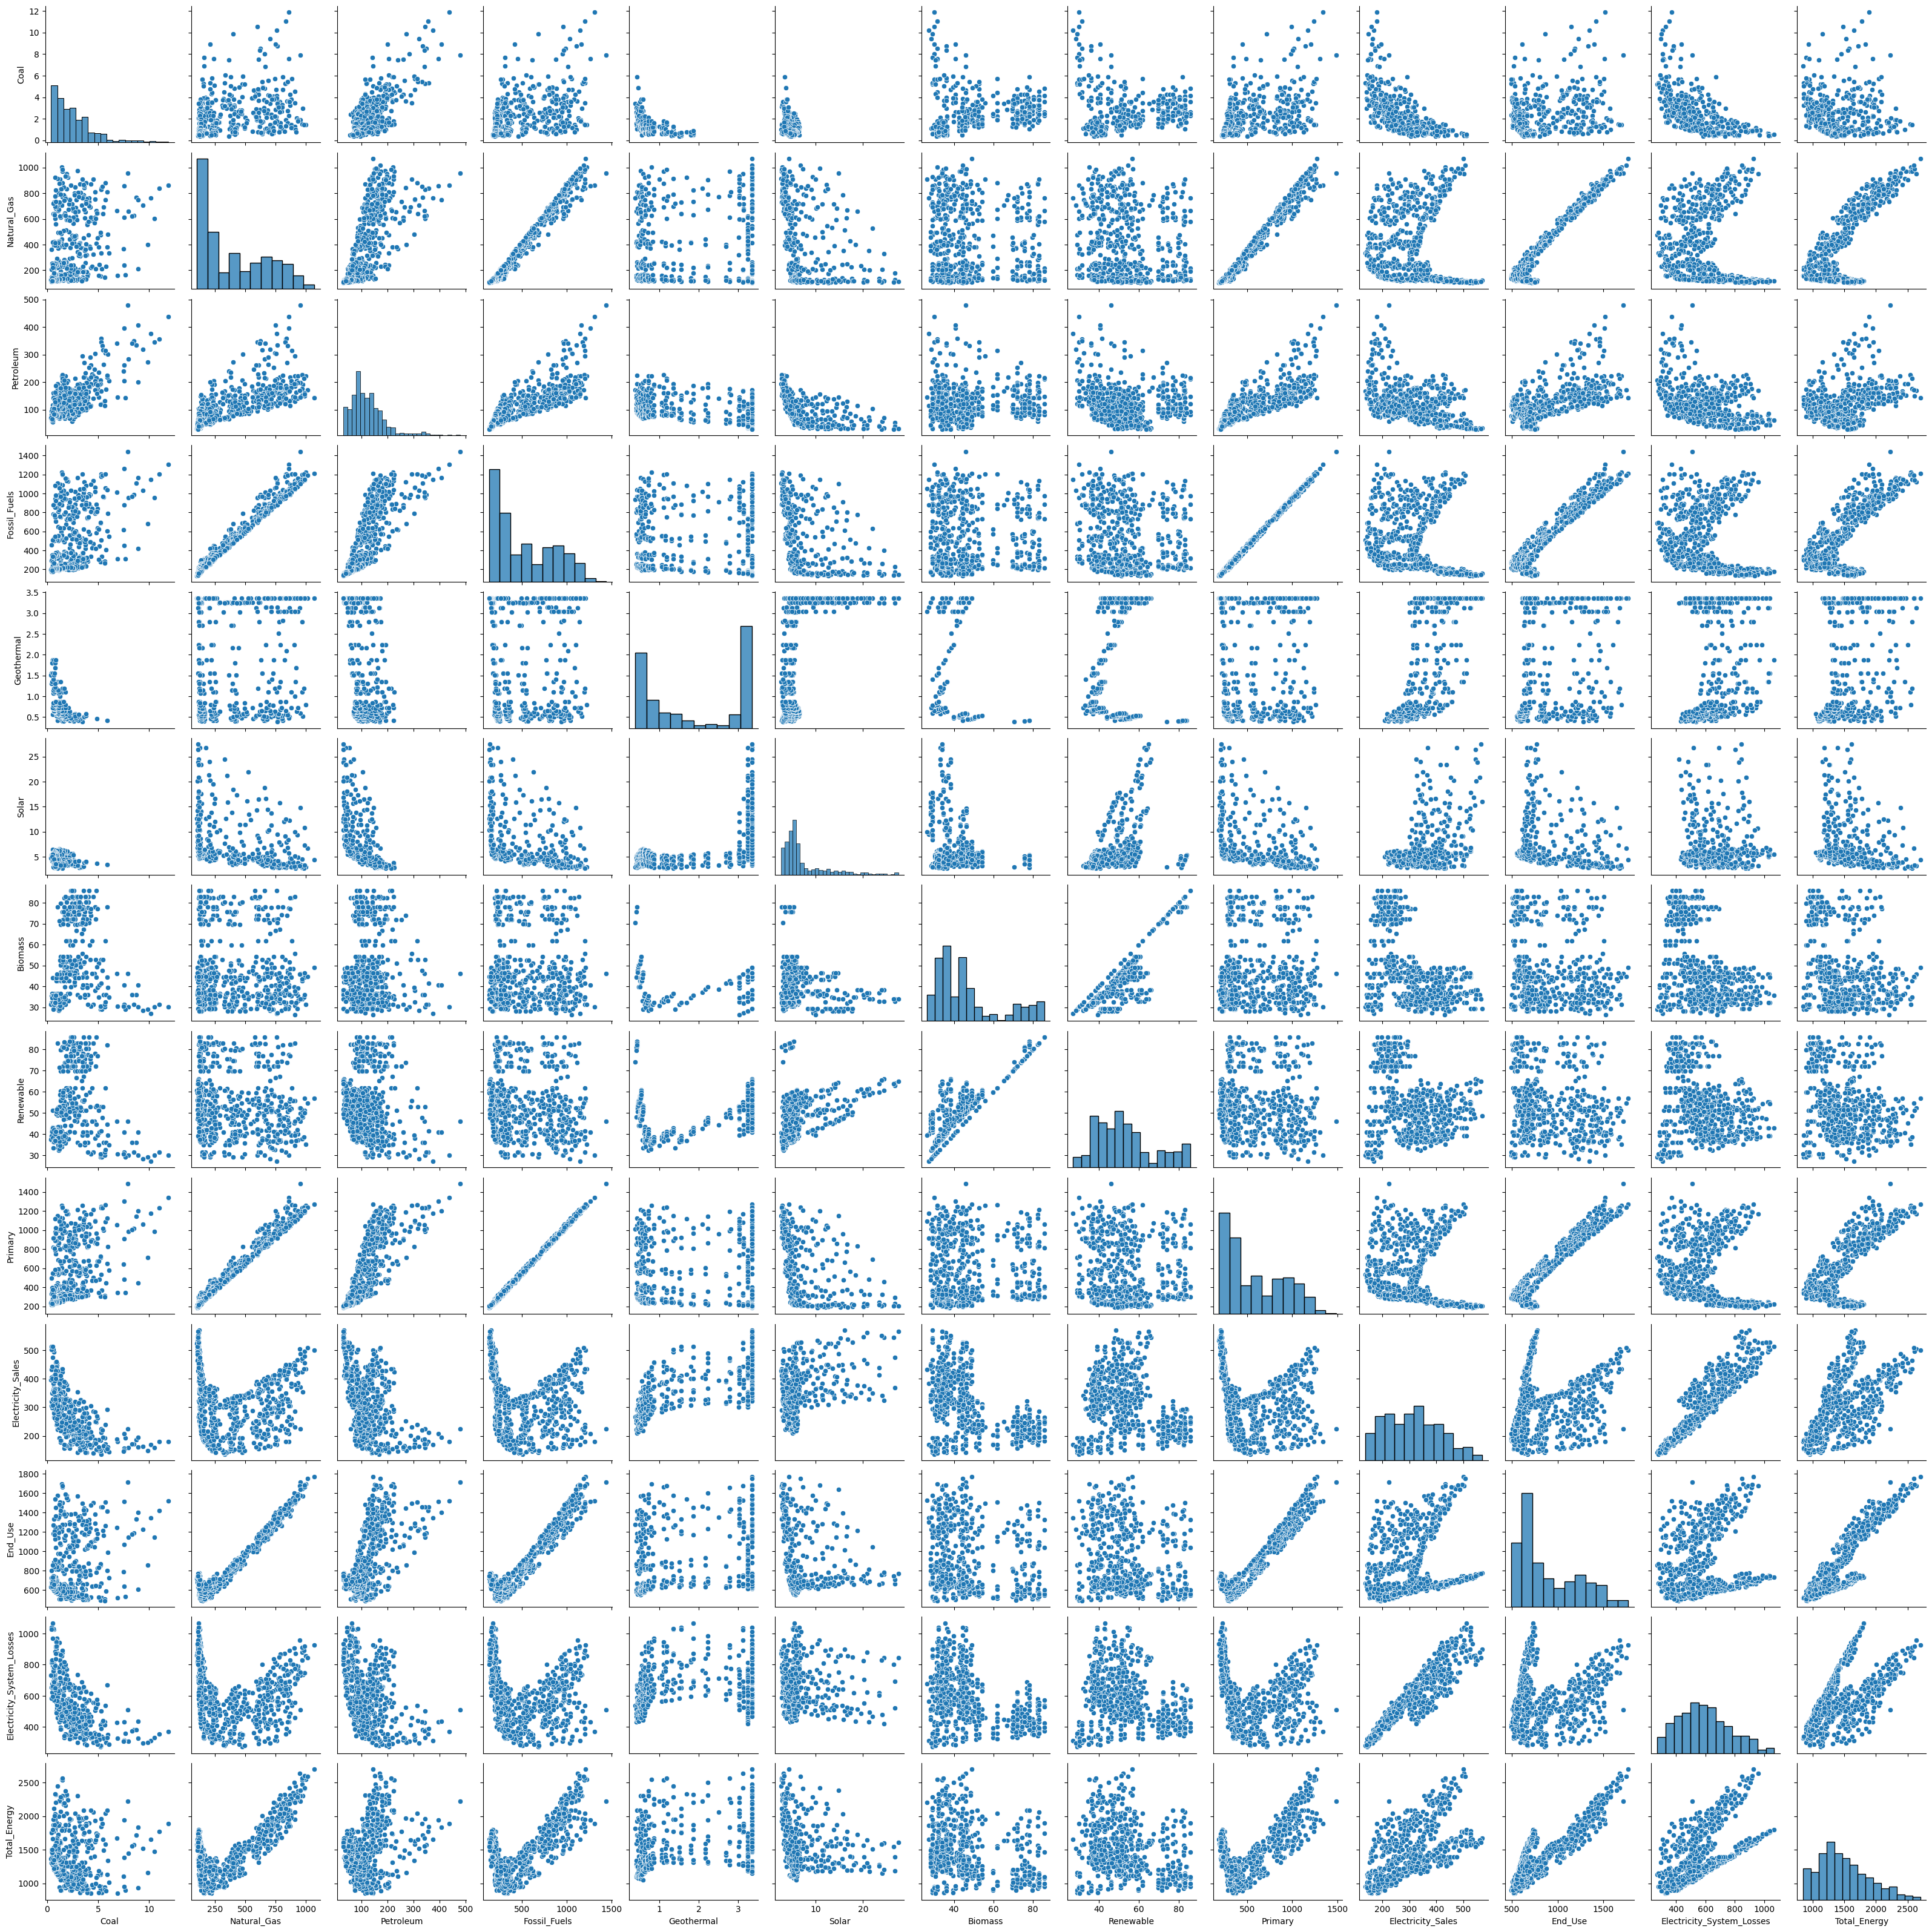

In [7]:
sns.pairplot(elec)

## Fails

This next section includes lots and lots of trial and error. For a while, my data was refusing to work, just producing a straight line of observed data and basically no prediction. This, as you can guess, is bad. I played around a bit, trying adjusting the standard deviation, using different likelihoods, etc. Eventually, I landed on the conclusion that maybe one of the variables was messing everything up, which led to running a model with only 1 variable and individually adding 1 variable every time I ran the model to find which ones were working and which ones were messing everything up. This concluded with throwing out geothermal, solar, and coal. Don't know why these were bad, but it's not my fault, it's the data sets, so we move on.

In [53]:
X = elec[['Coal','Natural_Gas','Petroleum','Fossil_Fuels','Geothermal','Solar','Biomass','Renewable','Primary','Electricity_Sales','End_Use','Electricity_System_Losses']]#.to_numpy()
Y = elec["Total_Energy"]#.to_numpy()

In [54]:
with pm.Model() as model_elec:
    s = pm.HalfNormal('s',5) # lower standard deviation
    μ = pmb.BART("μ", X,Y, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_elec = pm.sample(compute_convergence_checks=False)

Output()

LOTS of divergences

Output()

<Axes: xlabel='y'>

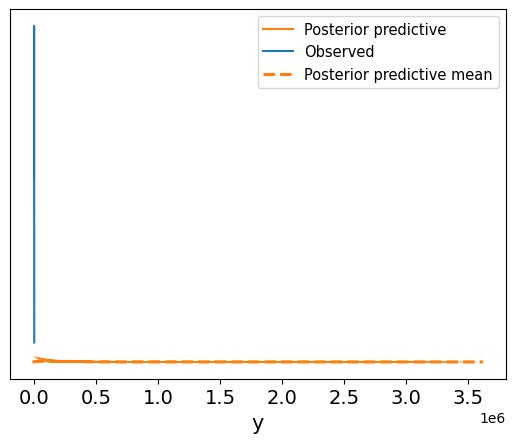

In [55]:
pm.sample_posterior_predictive(idata_elec,model_elec, extend_inferencedata=True)
az.plot_ppc(idata_elec, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [56]:
with pm.Model() as model_elec3:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", X,Y, m=100) # increasing the number of trees
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_elec3 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

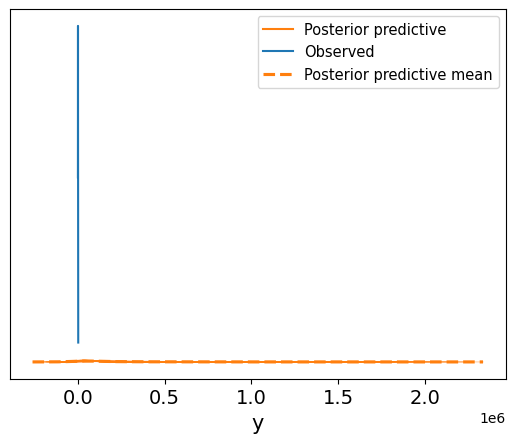

In [57]:
pm.sample_posterior_predictive(idata_elec3,model_elec3, extend_inferencedata=True)
az.plot_ppc(idata_elec3, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [58]:
Z = elec[['Coal','Natural_Gas','Petroleum','Geothermal','Solar','Biomass']].to_numpy()
W = elec["Total_Energy"].to_numpy()

In [59]:
with pm.Model() as model_elec4:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", Z,W, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=W)
    idata_elec4 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

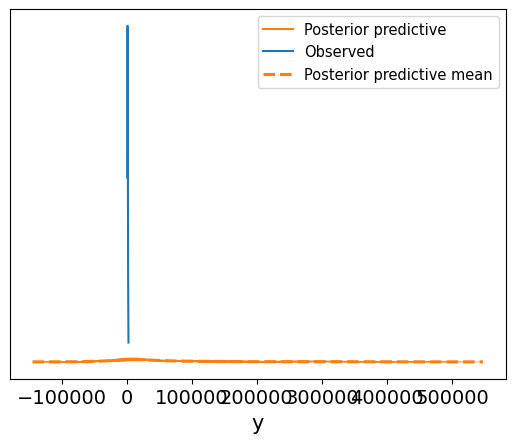

In [60]:
pm.sample_posterior_predictive(idata_elec4,model_elec4, extend_inferencedata=True)
az.plot_ppc(idata_elec4, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [61]:
A = elec[['Fossil_Fuels',"Renewable",'Primary','Electricity_System_Losses','Electricity_Sales','End_Use','Petroleum','Natural_Gas',"Biomass"]].to_numpy()
B = elec["Total_Energy"].to_numpy()

In [62]:
with pm.Model() as model_elec5:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", A,B, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=B)
    idata_elec5 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

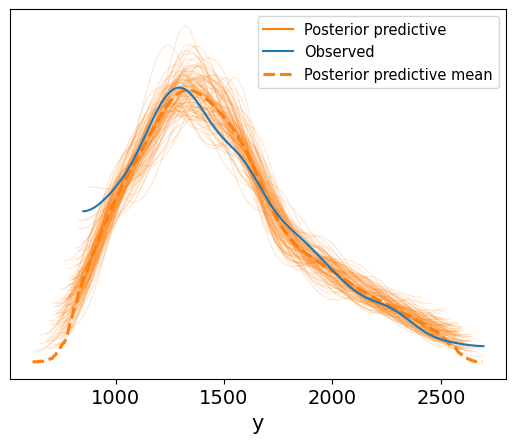

In [63]:
pm.sample_posterior_predictive(idata_elec5,model_elec5, extend_inferencedata=True)
az.plot_ppc(idata_elec5, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [64]:
posterior_mean = idata_elec5.posterior["μ"]

μ_hdi = az.hdi(ary=idata_elec5, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_elec5, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


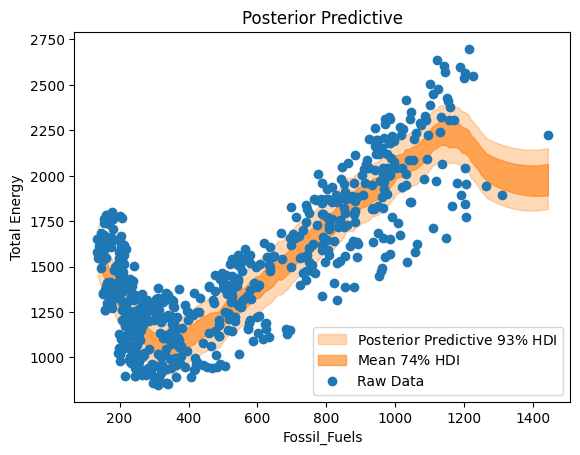

In [65]:
idx = np.argsort(A[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=A[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=A[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(elec['Fossil_Fuels'], elec["Total_Energy"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="Fossil_Fuels",
    ylabel="Total Energy",
);

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>,
       <Axes: xlabel='X_3'>, <Axes: xlabel='X_4'>, <Axes: xlabel='X_5'>,
       <Axes: xlabel='X_6'>, <Axes: xlabel='X_7'>, <Axes: xlabel='X_8'>],
      dtype=object)

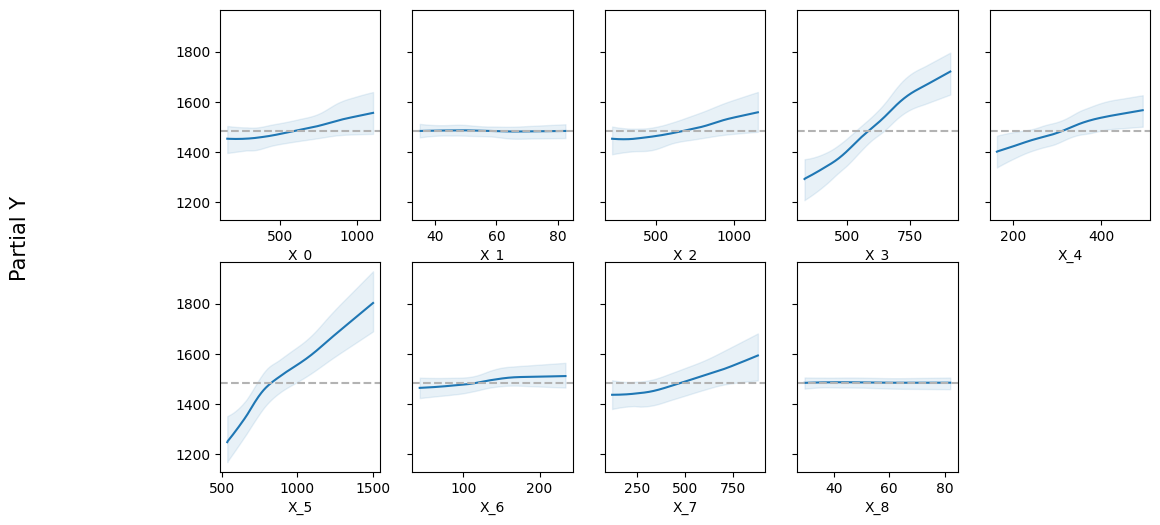

In [66]:
pmb.plot_pdp(μ, A, B, grid=(1, 5), figsize = (12,6))

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>,
       <Axes: xlabel='X_3'>, <Axes: xlabel='X_4'>, <Axes: xlabel='X_5'>,
       <Axes: xlabel='X_6'>, <Axes: xlabel='X_7'>, <Axes: xlabel='X_8'>],
      dtype=object)

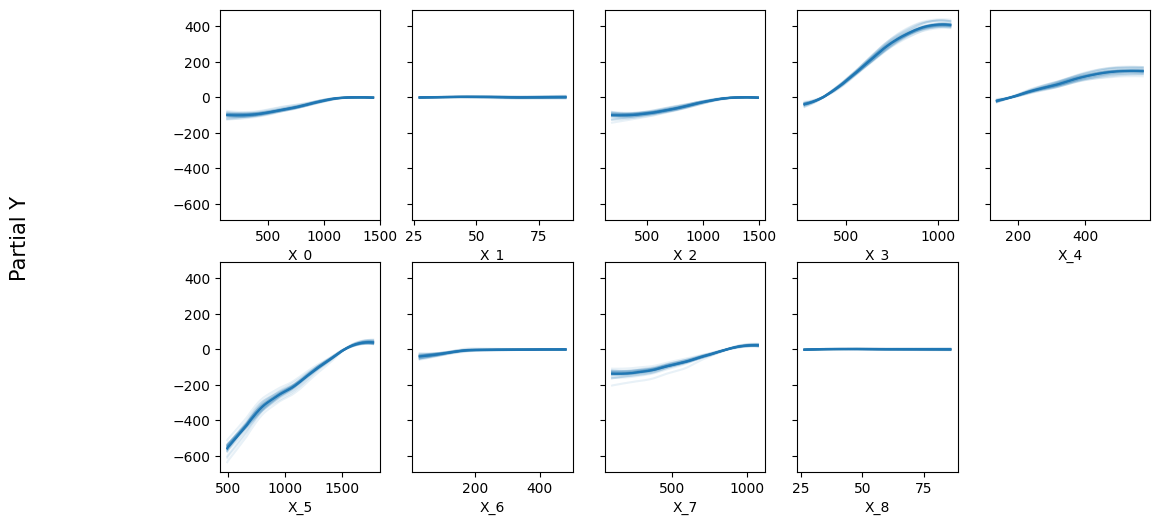

In [67]:
pmb.plot_ice( μ, A, B, grid=(1, 5), figsize = (12,6))

In [68]:
vi_elec = pmb.compute_variable_importance(idata_elec5, μ, A)

<Axes: ylabel='R²'>

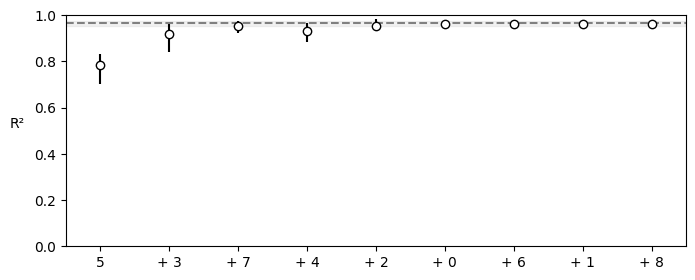

In [69]:
pmb.plot_variable_importance(vi_elec)

## Model #1

This was the first real model I ran with all the variables I wanted. Based on the variable importance plot, I thought end use was the most impactful variable, which I will continue working to confirm. The plot also told me which variables weren't really doing anything and that I could chop off. Based on that visual (very small change in R^2 value) I chopped fossil fuels, petroleum, renewable energy, and biomass.

In [8]:
C = elec[['Fossil_Fuels',"Renewable",'Primary','Electricity_System_Losses','Electricity_Sales','End_Use','Petroleum','Natural_Gas',"Biomass"]]
D = elec["Total_Energy"]
E = elec[['Fossil_Fuels',"Renewable",'Primary','Electricity_System_Losses','Electricity_Sales','End_Use','Petroleum','Natural_Gas',"Biomass"]].to_numpy()

I had to have 3 variables for each model since I wanted the variable importance plot to have names instead of numbers so I had to drop to_numpy. However, the mean plot needed the variables to be integers over strings. So I just used the string variable for the model and the numpy variable for the mean plot.

In [9]:
with pm.Model() as model_elec6:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", C,D, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=D)
    idata_elec6 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

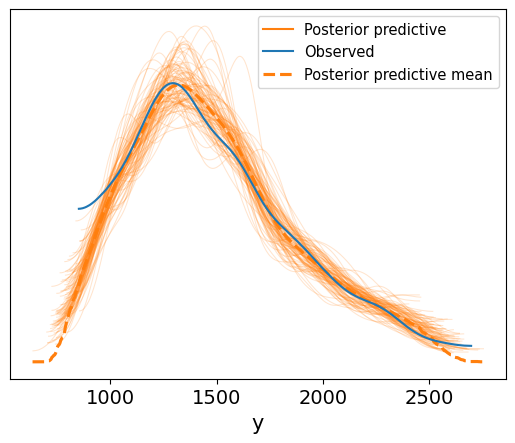

In [10]:
pm.sample_posterior_predictive(idata_elec6,model_elec6, extend_inferencedata=True)
az.plot_ppc(idata_elec6, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [11]:
posterior_mean = idata_elec6.posterior["μ"]

μ_hdi = az.hdi(ary=idata_elec6, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_elec6, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


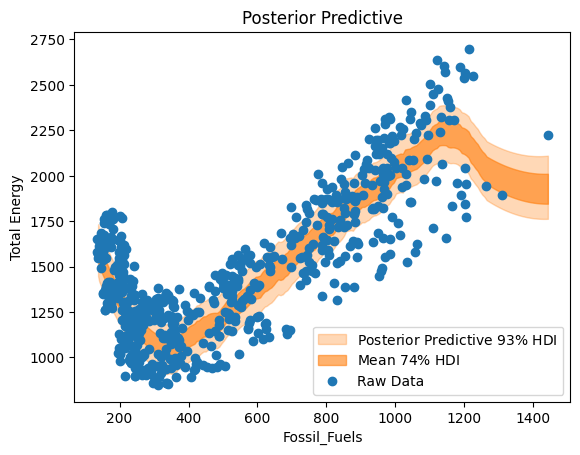

In [12]:
idx = np.argsort(E[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=E[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=E[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(elec['Fossil_Fuels'], elec["Total_Energy"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="Fossil_Fuels",
    ylabel="Total Energy",
);

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='Fossil_Fuels'>, <Axes: xlabel='Renewable'>,
       <Axes: xlabel='Primary'>,
       <Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Electricity_Sales'>, <Axes: xlabel='End_Use'>,
       <Axes: xlabel='Petroleum'>, <Axes: xlabel='Natural_Gas'>,
       <Axes: xlabel='Biomass'>], dtype=object)

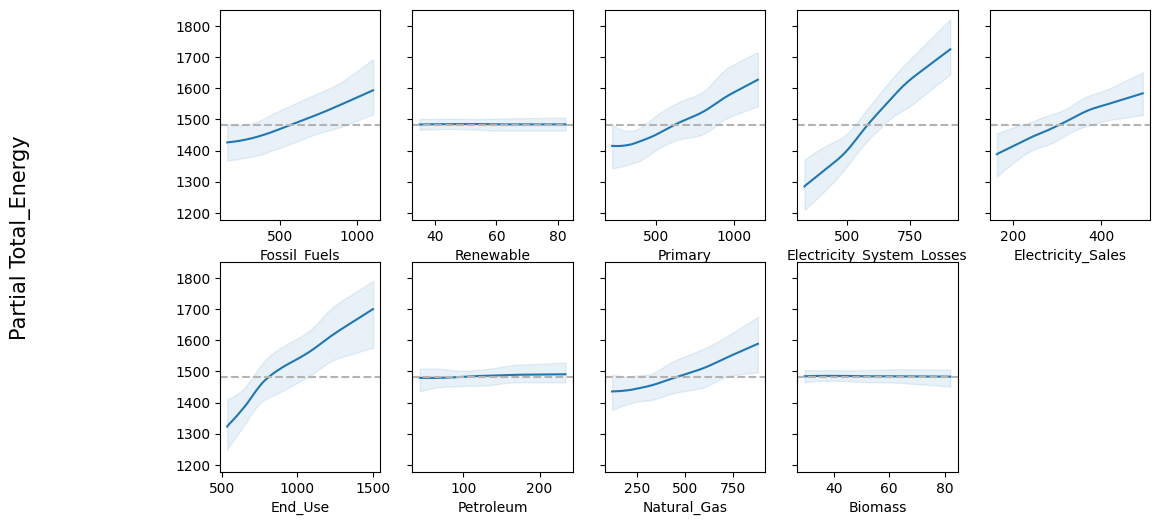

In [13]:
pmb.plot_pdp(μ, C, D, grid=(1, 5), figsize = (12,6))

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='Fossil_Fuels'>, <Axes: xlabel='Renewable'>,
       <Axes: xlabel='Primary'>,
       <Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Electricity_Sales'>, <Axes: xlabel='End_Use'>,
       <Axes: xlabel='Petroleum'>, <Axes: xlabel='Natural_Gas'>,
       <Axes: xlabel='Biomass'>], dtype=object)

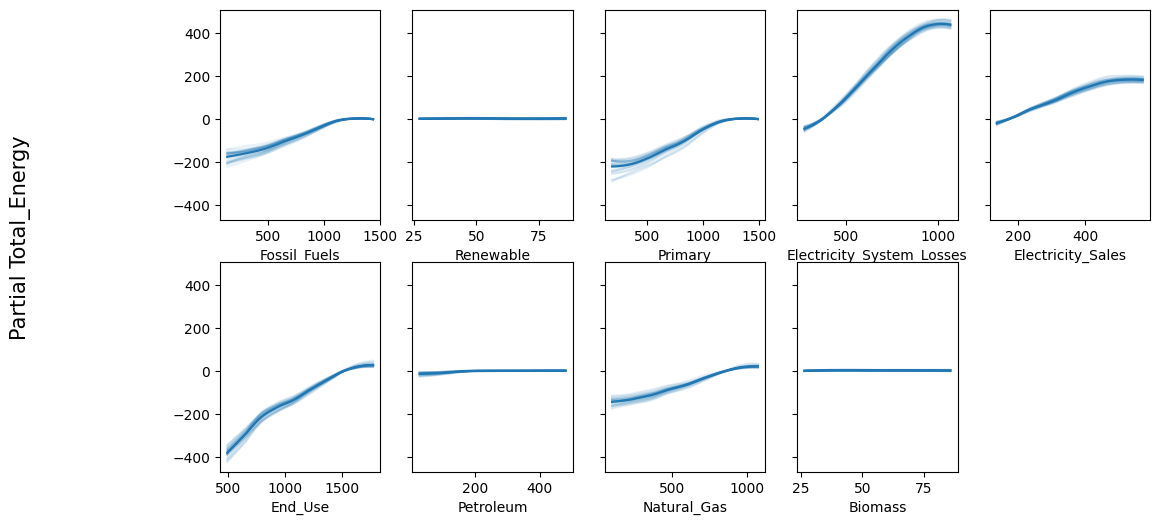

In [14]:
pmb.plot_ice(μ, C, D, grid=(1, 5), figsize = (12,6))

In [15]:
vi_elec2 = pmb.compute_variable_importance(idata_elec6, μ, C)

<Axes: ylabel='R²'>

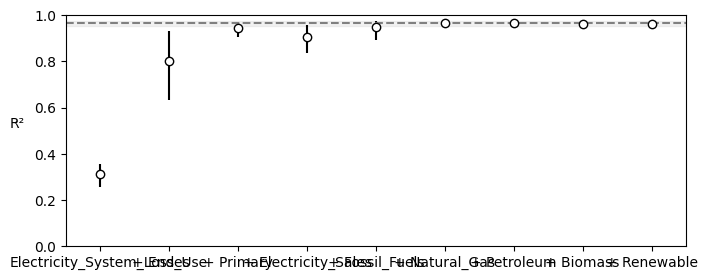

In [16]:
pmb.plot_variable_importance(vi_elec2)

# Chop #1

In [17]:
F = elec[['Primary','Electricity_System_Losses','Electricity_Sales','End_Use','Natural_Gas']]
G = elec["Total_Energy"]
H = elec[['Primary','Electricity_System_Losses','Electricity_Sales','End_Use','Natural_Gas']].to_numpy()

In [18]:
with pm.Model() as model_elec7:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", F,G, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=G)
    idata_elec7 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

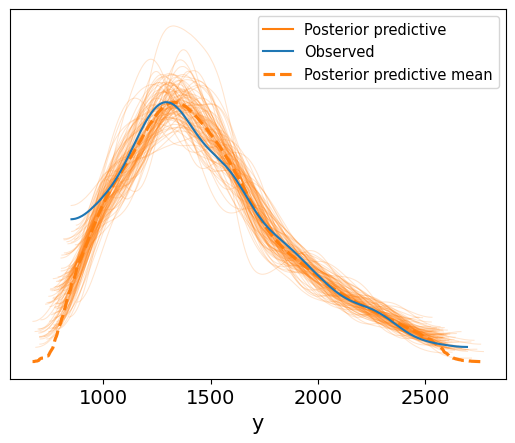

In [19]:
pm.sample_posterior_predictive(idata_elec7,model_elec7, extend_inferencedata=True)
az.plot_ppc(idata_elec7, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [20]:
posterior_mean = idata_elec7.posterior["μ"]

μ_hdi = az.hdi(ary=idata_elec7, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_elec7, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


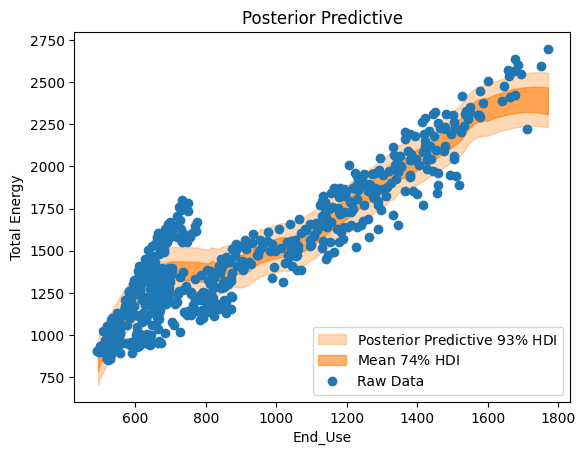

In [21]:
idx = np.argsort(H[:, 3])
fig, ax = plt.subplots()

az.plot_hdi(
    x=H[:, 3],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=H[:, 3],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(elec['End_Use'], elec["Total_Energy"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="End_Use",
    ylabel="Total Energy",
);

array([<Axes: xlabel='Primary'>,
       <Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Electricity_Sales'>, <Axes: xlabel='End_Use'>,
       <Axes: xlabel='Natural_Gas'>], dtype=object)

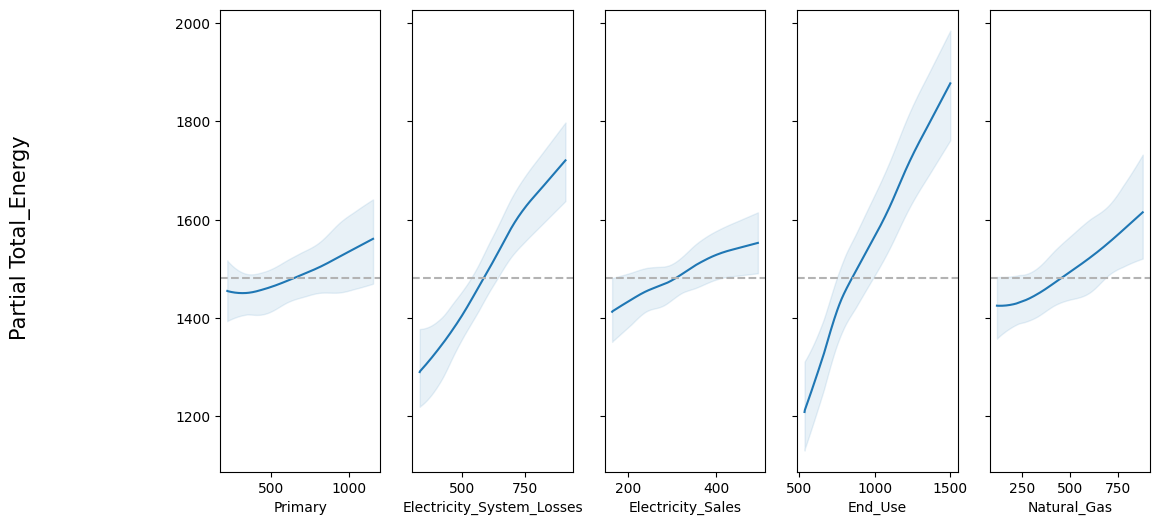

In [22]:
pmb.plot_pdp(μ, F, G, grid=(1, 5), figsize = (12,6))

array([<Axes: xlabel='Primary'>,
       <Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Electricity_Sales'>, <Axes: xlabel='End_Use'>,
       <Axes: xlabel='Natural_Gas'>], dtype=object)

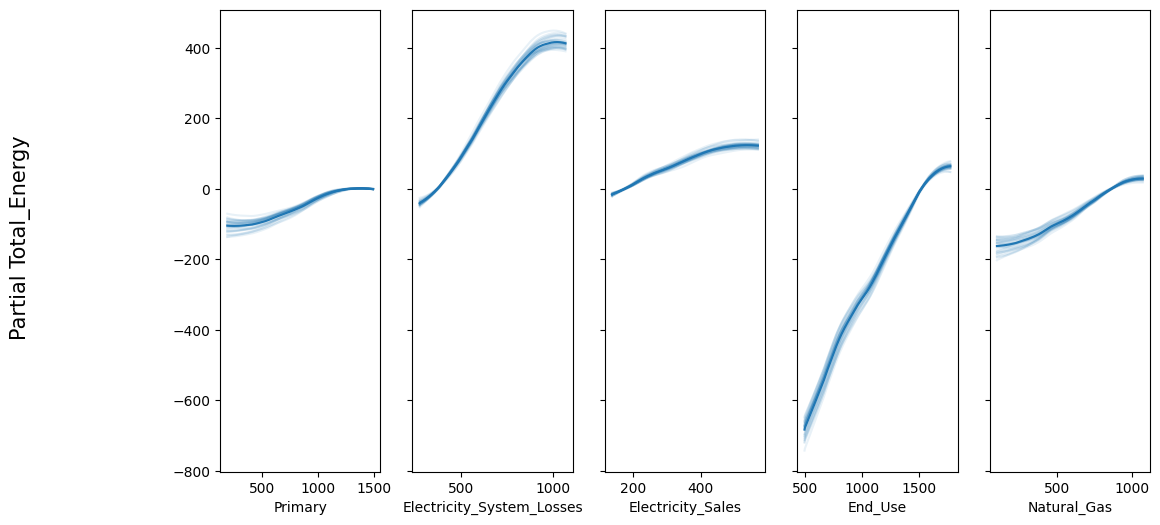

In [23]:
pmb.plot_ice(μ, F, G, grid=(1, 5), figsize = (12,6))

In [24]:
vi_elec3 = pmb.compute_variable_importance(idata_elec7, μ, F)

<Axes: ylabel='R²'>

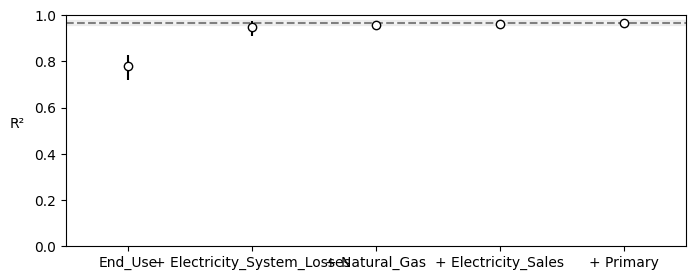

In [25]:
pmb.plot_variable_importance(vi_elec3)

From this plot, I knew that the two most important variables were end use and electricity system losses. However, it was really hard to tell visually which of the other three variables was effecting them the most. So, I ran 3 seperate models of end use and electricity system losses with one of the variables (primary, natural gas, and electricity sales). I then looked at the variable importance plot to see which one resulted in the most difference in R^2 values since the posterior predictive models were pretty much the same for all of them.

# Chop #2 (multiple attempts at what to chop)

In [26]:
I = elec[['Electricity_System_Losses','End_Use','Primary']]
J = elec["Total_Energy"]
K = elec[['Electricity_System_Losses','End_Use','Primary']].to_numpy()

In [27]:
with pm.Model() as model_elecP:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", I,J, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=J)
    idata_elecP = pm.sample(compute_convergence_checks=False)

Output()

Divergences :(

  Not the end of the world, it won't really hurt the model since there's so few, but not amazing news

Output()

<Axes: xlabel='y'>

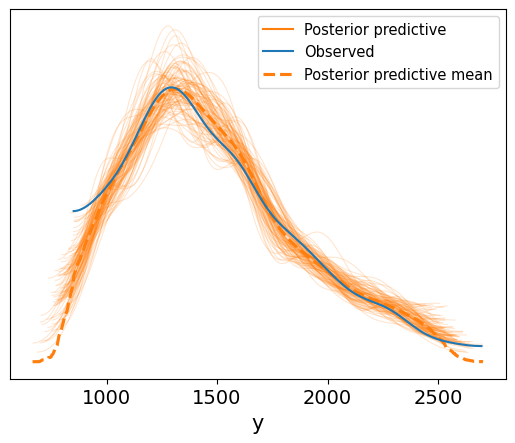

In [28]:
pm.sample_posterior_predictive(idata_elecP,model_elecP, extend_inferencedata=True)
az.plot_ppc(idata_elecP, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [29]:
posterior_mean = idata_elecP.posterior["μ"]

μ_hdi = az.hdi(ary=idata_elecP, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_elecP, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


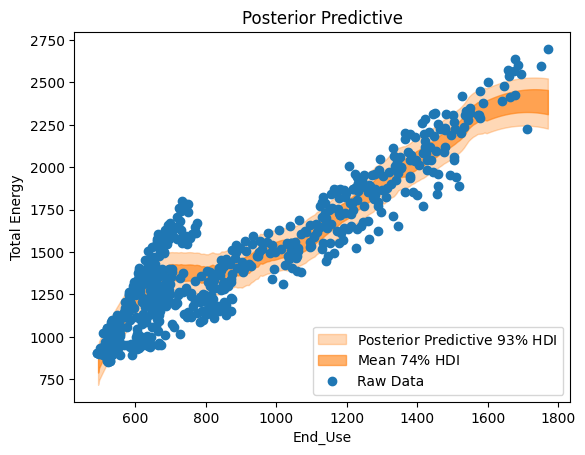

In [30]:
idx = np.argsort(K[:, 1])
fig, ax = plt.subplots()

az.plot_hdi(
    x=K[:, 1],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=K[:, 1],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(elec['End_Use'], elec["Total_Energy"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="End_Use",
    ylabel="Total Energy",
);

array([<Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='End_Use'>, <Axes: xlabel='Primary'>], dtype=object)

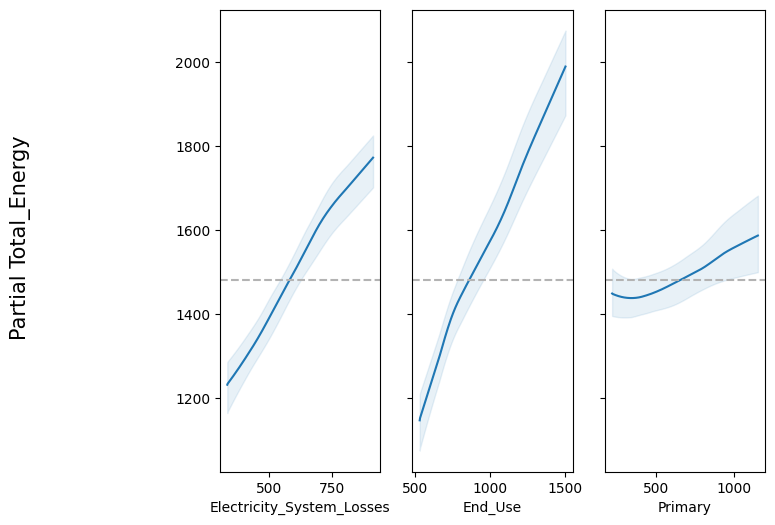

In [31]:
pmb.plot_pdp(μ, I, J, grid=(1, 5), figsize = (12,6))

array([<Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='End_Use'>, <Axes: xlabel='Primary'>], dtype=object)

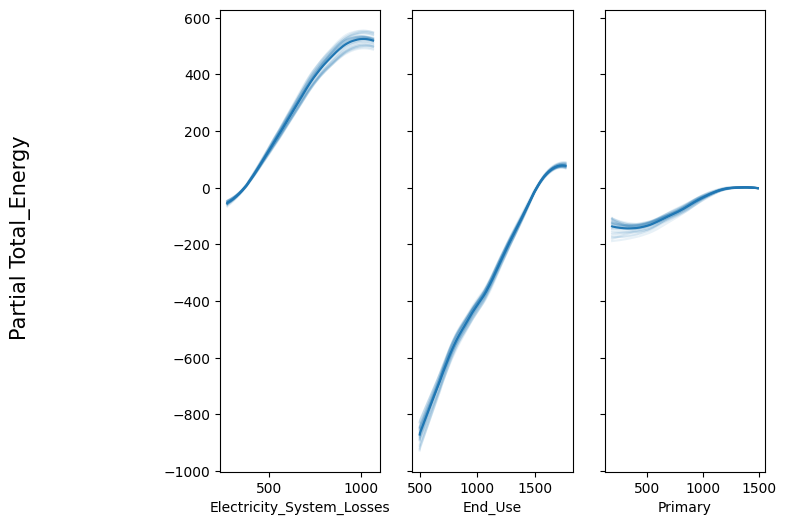

In [32]:
pmb.plot_ice(μ, I, J, grid=(1, 5), figsize = (12,6))

In [33]:
vi_elecP = pmb.compute_variable_importance(idata_elecP, μ, I)

<Axes: ylabel='R²'>

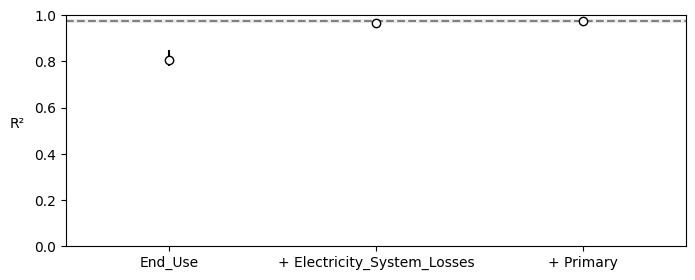

In [34]:
pmb.plot_variable_importance(vi_elecP)

Horrible plot for my purposes. Primary made the R^2 value even smaller.



---



In [35]:
L = elec[['Electricity_System_Losses','Electricity_Sales','End_Use']]
M = elec["Total_Energy"]
N = elec[['Electricity_System_Losses','Electricity_Sales','End_Use']].to_numpy()

In [36]:
with pm.Model() as model_elecES:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", L,M, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=M)
    idata_elecES = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

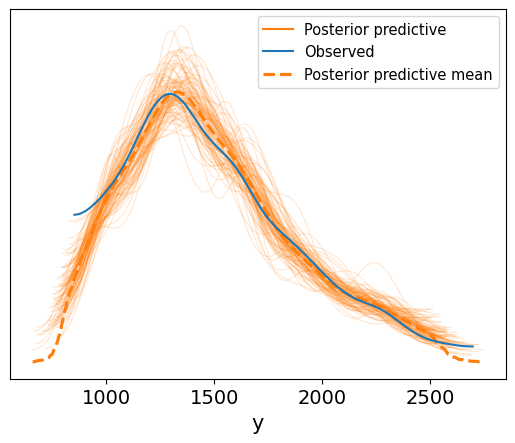

In [37]:
pm.sample_posterior_predictive(idata_elecES,model_elecES, extend_inferencedata=True)
az.plot_ppc(idata_elecES, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [38]:
posterior_mean = idata_elecES.posterior["μ"]

μ_hdi = az.hdi(ary=idata_elecES, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_elecES, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


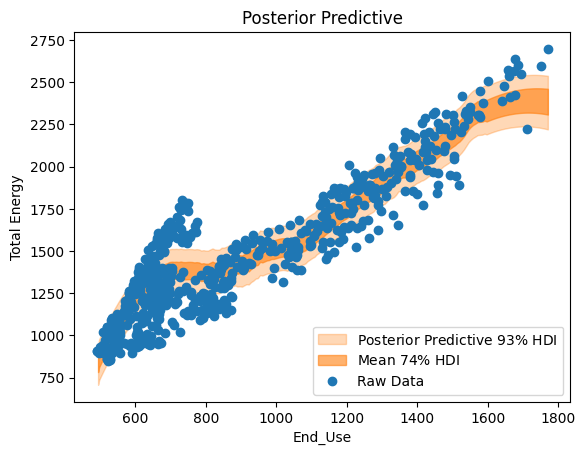

In [39]:
idx = np.argsort(N[:, 2])
fig, ax = plt.subplots()

az.plot_hdi(
    x=N[:, 2],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=N[:, 2],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(elec['End_Use'], elec["Total_Energy"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="End_Use",
    ylabel="Total Energy",
);

array([<Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Electricity_Sales'>, <Axes: xlabel='End_Use'>],
      dtype=object)

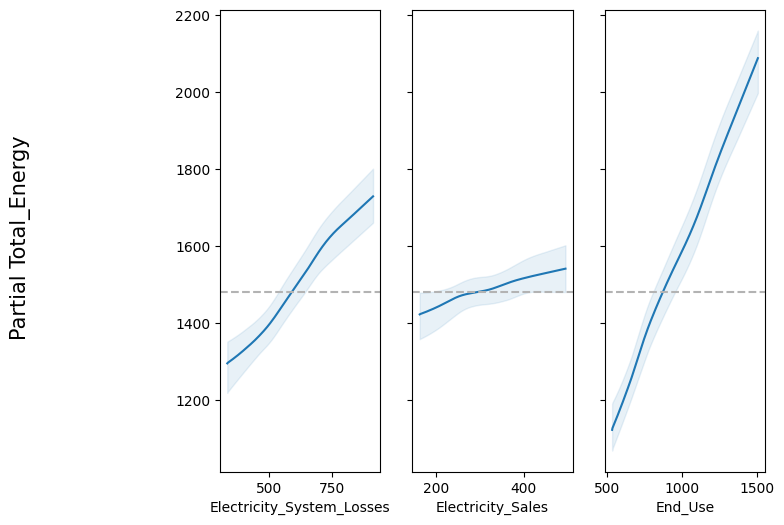

In [40]:
pmb.plot_pdp(μ, L, M, grid=(1, 5), figsize = (12,6))

array([<Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Electricity_Sales'>, <Axes: xlabel='End_Use'>],
      dtype=object)

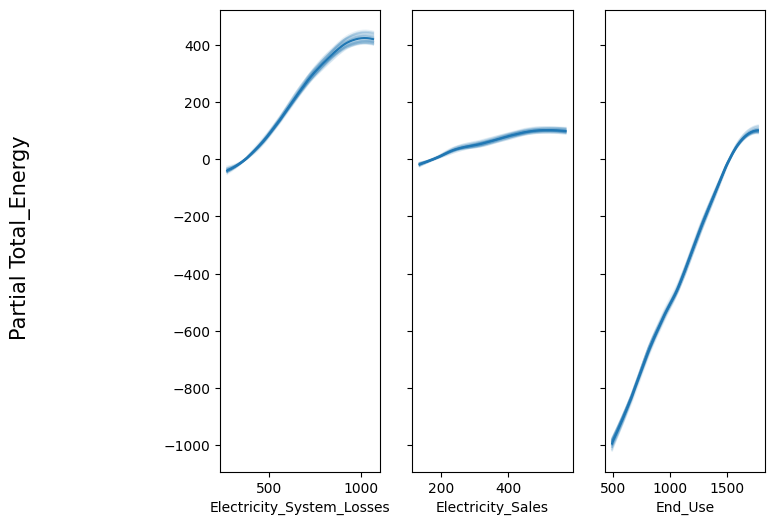

In [41]:
pmb.plot_ice(μ, L, M, grid=(1, 5), figsize = (12,6))

In [42]:
vi_elecES = pmb.compute_variable_importance(idata_elecES, μ, L)

<Axes: ylabel='R²'>

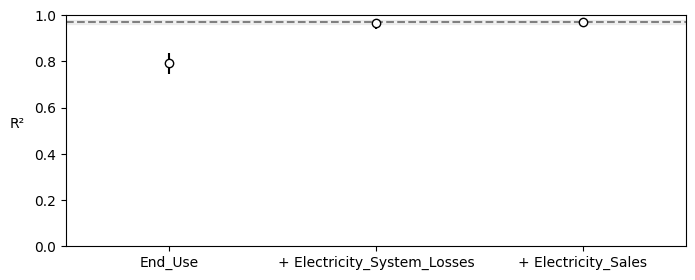

In [43]:
pmb.plot_variable_importance(vi_elecES)

Also bad :(

# Final Model

In [44]:
O = elec[['Electricity_System_Losses','Natural_Gas','End_Use']]
P = elec["Total_Energy"]
Q= elec[['Electricity_System_Losses','Natural_Gas','End_Use']].to_numpy()

In [45]:
with pm.Model() as model_elecNG:
    s = pm.HalfNormal('s',500)
    μ = pmb.BART("μ", O,P, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=P)
    idata_elecNG = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

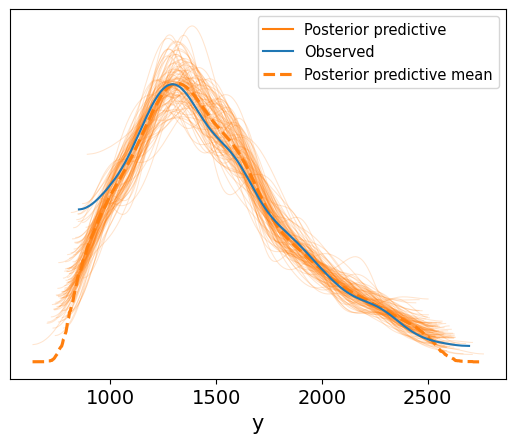

In [46]:
pm.sample_posterior_predictive(idata_elecNG,model_elecNG, extend_inferencedata=True)
az.plot_ppc(idata_elecNG, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [47]:
posterior_mean = idata_elecNG.posterior["μ"]

μ_hdi = az.hdi(ary=idata_elecNG, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_elecNG, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


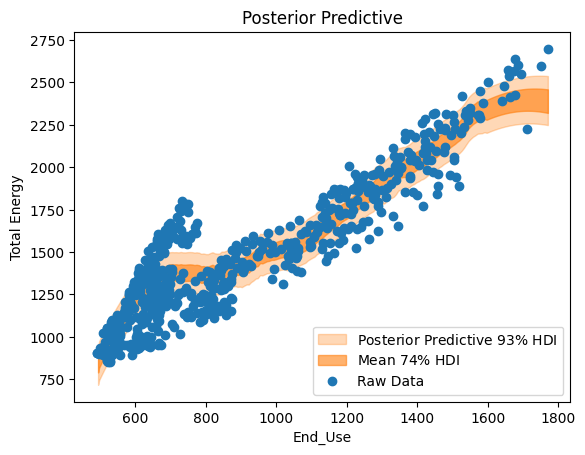

In [48]:
idx = np.argsort(Q[:, 2])
fig, ax = plt.subplots()

az.plot_hdi(
    x=Q[:, 2],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=Q[:, 2],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(elec['End_Use'], elec["Total_Energy"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="End_Use",
    ylabel="Total Energy",
);

array([<Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Natural_Gas'>, <Axes: xlabel='End_Use'>],
      dtype=object)

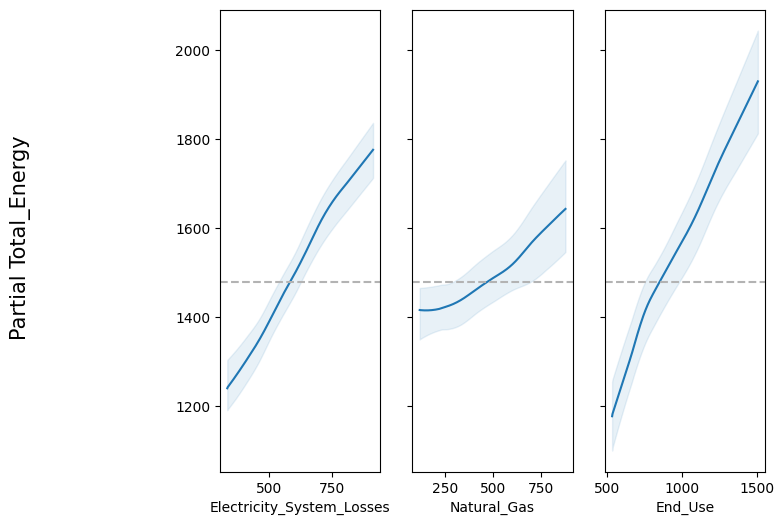

In [49]:
pmb.plot_pdp(μ, O, P, grid=(1, 5), figsize = (12,6))

array([<Axes: xlabel='Electricity_System_Losses'>,
       <Axes: xlabel='Natural_Gas'>, <Axes: xlabel='End_Use'>],
      dtype=object)

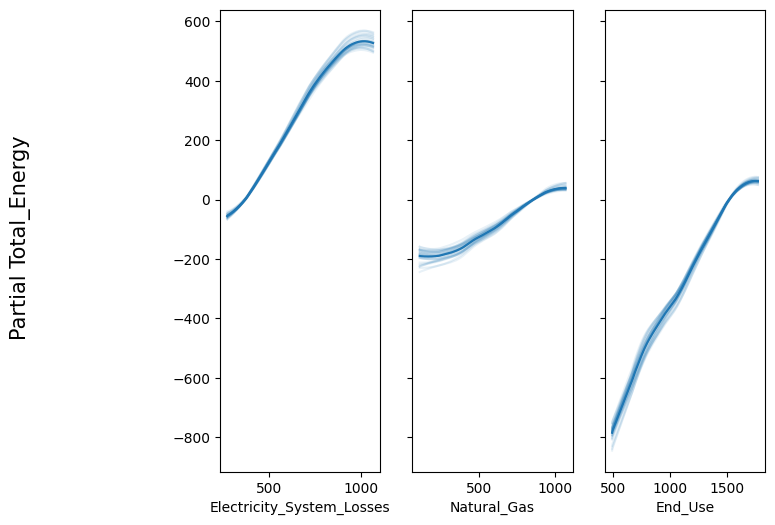

In [50]:
pmb.plot_ice(μ, O, P, grid=(1, 5), figsize = (12,6))

In [51]:
vi_elecNG = pmb.compute_variable_importance(idata_elecNG, μ, O)

<Axes: ylabel='R²'>

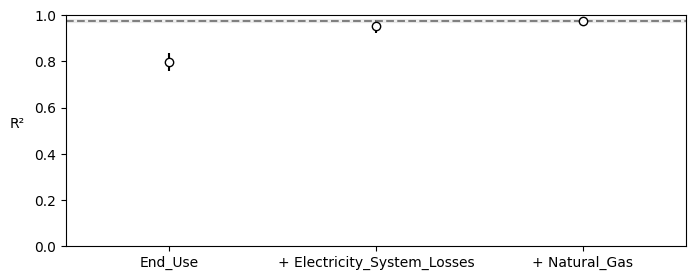

In [52]:
pmb.plot_variable_importance(vi_elecNG)

The two variables with the most competition for 3rd are natural gas and electricity sales. Both have a strong conceptual argument; natural gas is used in many common household appliances like gas stoves and electricity sales would obviously contribute to how much energy a person uses since they can only use as much electricity as they have. Looking at the plots, the variable importance plot for natural gas has a teeny tiny bit more difference than electricity sales but it's kinda hard to tell. The more evidence difference is in the pdp plots. The electricity system losses and end use plots look mostly the same, with the natural gas one just every so slightly more linear for electricity system losses. But the difference between the pdp plots for natural gas and electricity sales specifically is very clear. Natural gas has a much more positive trend and therefore takes the cake for 3rd place.

Comparing the other plots to this one, the 3rd most influencial variable as natural gas. So, the 3 things that contribute the most to total energy consumption in residencial sectors in the US is **end use energy** which is energy that is directly consumed by the user for stuff like heating, cooling, lighting, powering appliances, and transportation, **natural gas** so like stoves, ovens, water heaters, clothes dryers, grills, fireplaces, etc, and **electricity system losses** so the gereral ineffectiveness of the things our daily electricity usage stems from contributes alot to how much energy we consume. That's a wonderful picture for environmentalists.

End use energy makes a ton of sense being the top variable. End use energy is energy directly consumed by the user so a lot of the other variables are contributing to this number. My causal diagram confirms this result. People use so much energy in every aspect of their lives that while these results are sad, they aren't suprising.